## Base: Airline passenger satisfaction

* https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [10]:
# df = pd.read_csv('train.csv')
df = pd.read_csv('test.csv')

In [11]:
df.shape

(25976, 25)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

## Limpeza dos Dados

### Dados Faltantes

In [13]:
df.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [14]:
# Remove id and Unnamed: 0
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)

In [15]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Substituição dados faltantes em Arrival Delay in Minutes

In [16]:
media = df['Arrival Delay in Minutes'].mean()
df['Arrival Delay in Minutes'].fillna(media, inplace=True)

In [17]:
df['Arrival Delay in Minutes'].isnull().sum()

0

## Transformação dados categóricos

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
for i in df.columns:
  if(df[i].dtype=='object'):
    print(f'{i}: {df[i].unique()}')

Gender: ['Female' 'Male']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Business travel' 'Personal Travel']
Class: ['Eco' 'Business' 'Eco Plus']
satisfaction: ['satisfied' 'neutral or dissatisfied']


In [20]:
# Transforma os dados categóricos
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Customer Type'] = labelencoder.fit_transform(df['Customer Type'])
df['Type of Travel'] = labelencoder.fit_transform(df['Type of Travel'])
df['Class'] = labelencoder.fit_transform(df['Class'])
df['satisfaction'] = labelencoder.fit_transform(df['satisfaction'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  int64  
 1   Customer Type                      25976 non-null  int64  
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  int64  
 4   Class                              25976 non-null  int64  
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

## Normalização de atributos numéricos

In [22]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [23]:
scaler_cols = ['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes']
print(scaler_cols)

['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ajuste = scaler.fit(df[scaler_cols])
df[scaler_cols] = ajuste.transform(df[scaler_cols])

In [25]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,0.817887,0,1,-1.035171,1.703853,0.621641,0.172143,0.797831,...,1.227138,1.259170,1.250974,1.161716,-1.035348,1.144063,1.298998,0.953810,0.781143,1
1,0,0,-0.239238,0,0,1.671443,-1.291598,-1.334871,0.172143,-1.542065,...,0.479907,0.479178,0.492730,0.311739,-0.247517,0.297077,1.298998,-0.382286,-0.393543,1
2,1,1,-1.296363,0,1,-1.003128,-0.542735,-1.987042,-0.535609,0.797831,...,-1.014556,0.479178,-1.782001,-0.538238,-1.035348,-1.396893,-0.974927,-0.382286,-0.393543,0
3,1,0,0.289325,0,0,2.186131,-2.040460,-1.987042,-1.951114,-0.762100,...,-1.761787,-1.860800,-1.782001,-2.238193,-0.247517,-2.243878,0.541023,-0.382286,-0.233358,1
4,0,0,0.619676,0,1,-0.011804,-0.542735,-0.030530,0.879895,0.017866,...,-1.014556,-1.080807,-1.023758,-1.388216,0.540315,-1.396893,0.541023,-0.382286,0.140405,1


## Modelos de Machine Learning

### Separação entre treino e teste

In [26]:
# Formato dataframe e series
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Randon Forest

In [28]:
forest = RandomForestClassifier(n_estimators = 100)

forest.fit(X_train, y_train)
forest_score = forest.score(X_train, y_train)
forest_test = forest.score(X_test, y_test)

y_pred = forest.predict(X_test)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)


Training Score 1.0
Testing Score 
 0.9538046965225202


### Métricas de avaliação

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

In [30]:
# Acuracidade
print("ACC: %.3f" %(accuracy_score(y_test,y_pred)))
#Revocação
print("Recall :%.2f" %(recall_score(y_test,y_pred)))
#Precisão
print("Precision :%.2f" %(precision_score(y_test,y_pred)))
#F1-score
print("F1-score :%.2f" %(f1_score(y_test,y_pred)))


ACC: 0.954
Recall :0.94
Precision :0.96
F1-score :0.95


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4394
           1       0.96      0.94      0.95      3399

    accuracy                           0.95      7793
   macro avg       0.95      0.95      0.95      7793
weighted avg       0.95      0.95      0.95      7793



## Pipeline Sklearn
* Permite a criação de diferentes combinações de técnicas
* https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFE

In [33]:
 !pip install feature-engine

In [34]:
from feature_engine.selection import DropCorrelatedFeatures

### Separação entre treino e teste

In [35]:
# Formato dataframe e series
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Configuração das técnicas que serão utilizadas

In [37]:
# Inclusão DecisionTree
from sklearn.tree import DecisionTreeClassifier
CLF = DecisionTreeClassifier()
CLF.fit(X_train, y_train)
CLF_pred = CLF.predict(X_test)

# Inclusão KNN
# from sklearn.neighbors import KNeighborsClassifier
# CLF = KNeighborsClassifier()
# CLF.fit(X_train, y_train)
# CLF_pred = CLF.predict(X_test)

In [38]:
# Configurações das técnicas de seleção e predição
mi = SelectKBest(mutual_info_classif, k=15)

dropC = DropCorrelatedFeatures(
    threshold=0.8,
    method='pearson')

sfs = SFS(
    estimator=CLF,
    n_features_to_select=15,
    direction='forward',
    scoring='f1'
)

rfe = RFE(estimator=CLF,
        n_features_to_select=15, step=1)

In [39]:
# Feature Selection Techniques
## Mutual Information|
CLF1 = Pipeline([('mi', mi),
                ('CLF', CLF)])
CLF1.fit(X_train, y_train)
CLF1_pred = CLF1.predict(X_test)

## Drop Correlated
CLF2 = Pipeline([('dropC', dropC),
                ('CLF', CLF)])
CLF2.fit(X_train, y_train)
CLF2_pred = CLF2.predict(X_test)

## SFS
CLF3 = Pipeline([('sfs', sfs),
                ('CLF', CLF)])
CLF3.fit(X_train, y_train)
CLF3_pred = CLF3.predict(X_test)

# RFE
CLF4 = Pipeline([('rfe', rfe),
                ('CLF', CLF)])
CLF4.fit(X_train, y_train)
CLF4_pred = CLF4.predict(X_test)

### Métricas de avaliação

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

In [41]:
# Acuracidade
print(">> Pipeline com Decision Tree")
print("ACC (Completo): %.3f" %(accuracy_score(y_test,CLF_pred)))
print("ACC (MI): %.3f" %(accuracy_score(y_test,CLF1_pred)))
print("ACC: (dropC) %.3f" %(accuracy_score(y_test,CLF2_pred)))
print("ACC: (SFS) %.3f" %(accuracy_score(y_test,CLF3_pred)))
print("ACC: (RFE) %.3f" %(accuracy_score(y_test,CLF4_pred)))
#Revocação
print("Recall (Completo):%.2f" %(recall_score(y_test,CLF_pred)))
print("Recall (MI):%.2f" %(recall_score(y_test,CLF1_pred)))
print("Recall (dropC):%.2f" %(recall_score(y_test,CLF2_pred)))
print("Recall (SFS):%.2f" %(recall_score(y_test,CLF3_pred)))
print("Recall (RFE):%.2f" %(recall_score(y_test,CLF4_pred)))
#Precisão
print("Precision (Completo):%.2f" %(precision_score(y_test,CLF_pred)))
print("Precision (MI):%.2f" %(precision_score(y_test,CLF1_pred)))
print("Precision (dropC):%.2f" %(precision_score(y_test,CLF2_pred)))
print("Precision (SFS):%.2f" %(precision_score(y_test,CLF3_pred)))
print("Precision (RFE):%.2f" %(precision_score(y_test,CLF4_pred)))
#F1-score
print("F1-score (Completo):%.2f" %(f1_score(y_test,CLF_pred)))
print("F1-score (MI):%.2f" %(f1_score(y_test,CLF1_pred)))
print("F1-score (dropC):%.2f" %(f1_score(y_test,CLF2_pred)))
print("F1-score (SFS):%.2f" %(f1_score(y_test,CLF3_pred)))
print("F1-score (RFE):%.2f" %(f1_score(y_test,CLF4_pred)))


>> Pipeline com Decision Tree
ACC (Completo): 0.934
ACC (MI): 0.923
ACC: (dropC) 0.933
ACC: (SFS) 0.940
ACC: (RFE) 0.935
Recall (Completo):0.92
Recall (MI):0.92
Recall (dropC):0.92
Recall (SFS):0.93
Recall (RFE):0.93
Precision (Completo):0.93
Precision (MI):0.91
Precision (dropC):0.92
Precision (SFS):0.93
Precision (RFE):0.92
F1-score (Completo):0.92
F1-score (MI):0.91
F1-score (dropC):0.92
F1-score (SFS):0.93
F1-score (RFE):0.93


#### Similaridade das Features

In [42]:
featuresMutualInfromation = CLF1[:-1].get_feature_names_out()
featuresDropCorrelated = CLF2[:-1].get_feature_names_out()
featuresSFS = CLF3[:-1].get_feature_names_out()
featuresRFE = CLF4[:-1].get_feature_names_out()

#### Diagrama de Venn (Até 4 conjuntos)
* Biblioteca Vennforest4Py
* https://pypi.org/project/venny4py/

In [43]:
# !pip install milkviz
!pip install venny4py

In [44]:
# import matplotlib_venn as venn
# import milkviz as mv
from venny4py.venny4py import *

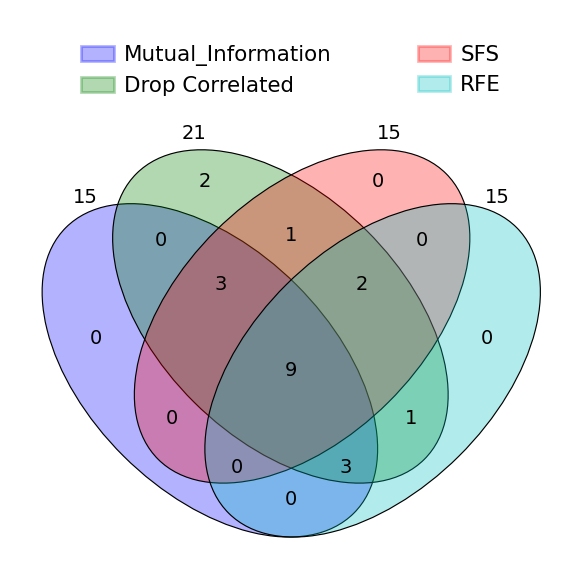

In [45]:
#dict of sets
sets = {
    'Mutual_Information': set(featuresMutualInfromation),
    'Drop Correlated': set(featuresDropCorrelated),
    'SFS': set(featuresSFS),
    'RFE': set(featuresRFE)
}

venny4py(sets=sets)

#### Features similares entre as 4 abordagens

In [46]:
set(featuresMutualInfromation).intersection(featuresDropCorrelated,featuresSFS,featuresRFE)

{'Baggage handling',
 'Class',
 'Inflight entertainment',
 'Inflight service',
 'Inflight wifi service',
 'On-board service',
 'Online boarding',
 'Seat comfort',
 'Type of Travel'}